In [3]:
from qiskit import QuantumCircuit, Aer, transpile, assemble
from qiskit.providers.aer import AerSimulator
from qiskit.visualization import plot_histogram
from math import sqrt

# Define the states u and v (for demonstration, we'll use 1-qubit states)
# For |u> = |0> and |v> = |0>
u = [1, 0]
v = [1, 0]

# Initialize quantum circuit
n = 1  # Number of qubits in u and v
qc = QuantumCircuit(n * 2 + 1, 1)

# Initialize states u and v
qc.initialize(u, 1)
qc.initialize(v, 2)

# Apply Hadamard gate on ancillary qubit (qubit 0)
qc.h(0)

# Apply controlled-SWAP
qc.cswap(0, 1, 2)

# Apply Hadamard on ancillary qubit again
qc.h(0)

# Measure the ancillary qubit
qc.measure(0, 0)

# Simulate the circuit
simulator = AerSimulator()
compiled_circuit = transpile(qc, simulator)
job = simulator.run(compiled_circuit, shots=1000)
result = job.result()

# Get measurement results and calculate probability of measuring '0'
counts = result.get_counts()
prob_0 = counts.get('0', 0) / sum(counts.values())

# Calculate <u|v> from the probability of measuring '0'
inner_product_squared = 2 * prob_0 - 1

# Display results
print(f"Counts: {counts}")
print(f"P(0): {prob_0}")
print(f"|<u|v>|^2: {inner_product_squared}")
# Plot the measurement results
plot_histogram(counts).show()



Counts: {'0': 1000}
P(0): 1.0
|<u|v>|^2: 1.0


## 3: Grover's Search Numerics
### 3b. For each value of \(n \in \lbrace 1,2,3, \dots, 500 \rbrace\), find the number \(k, 1 \leq k \leq \sqrt{n}\), of queries to make, in Grover's search algorithm, that maximizes the success probability. Assume that there is always exactly one marked item. Plot your answers, superimposed with the graph of \({\pi \over 4} \sqrt{n}\). 

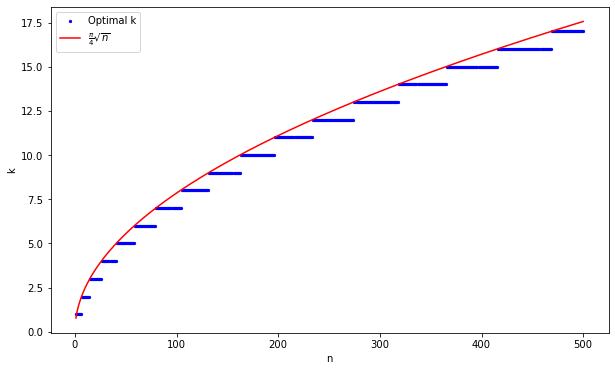

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Find k that maximizes P(k, n)
def find_best_k(n):
    theta = np.arcsin(1/np.sqrt(n))
    max_prob = 0
    best_k = 1
    for k in range(1, int(np.sqrt(n)) + 1):
        prob = np.sin((2*k + 1) * theta)**2
        if prob > max_prob:
            max_prob = prob
            best_k = k
    return best_k

# Generate data points
n_values = np.arange(1, 501)
k_values = [find_best_k(n) for n in n_values]

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(n_values, k_values, label="Optimal k", s=5, c='b')
plt.plot(n_values, np.pi/4 * np.sqrt(n_values), label=r"$\frac{\pi}{4} \sqrt{n}$", c='r')
plt.xlabel('n')
plt.ylabel('k')
plt.legend()
plt.show()


In [9]:
import numpy as np
import itertools

# Constants
omega = np.exp(2j * np.pi / 10)
tau = (1 + np.sqrt(5)) / 2

# Define the native gates
M1 = np.array([[omega**(-4), 0], [0, omega**3]])
M1_inv = np.linalg.inv(M1)

M2 = (1 / np.sqrt(tau)) * np.array([[1, 1], [1, -1]])
M2 = M2 @ M1 @ M2.T.conj()
M2_inv = np.linalg.inv(M2)

# Function to calculate the norm between two matrices
def matrix_norm(A, B):
    return np.linalg.norm(A - B, 'fro')

# Goal matrix
goal = np.array([[0, 1], [1, 0]])

# Initialize
best_norm = np.inf
best_sequence = []

gates = [M1, M1_inv, M2, M2_inv]
gate_names = ['M1', 'M1_inv', 'M2', 'M2_inv']

# Brute-force search
for n in range(1, 9):  # Length up to 8
    for seq in itertools.product(gates, repeat=n):
        names = [gate_names[gates.index(g)] for g in seq]
        
        # Calculate the resulting matrix from the sequence
        result = np.eye(2)
        for gate in seq:
            result = gate @ result
        
        # Calculate the norm to the goal matrix
        norm = matrix_norm(goal, result)
        
        if norm < best_norm:
            best_norm = norm
            best_sequence = names
            
            # Print updated best sequence and its norm
            print("Best sequence:", best_sequence)
            print("Best norm:", best_norm)



Best sequence: ['M1']
Best norm: 2.0


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [10]:
import numpy as np
import itertools

# Constants
omega = np.exp(2j * np.pi / 10)
tau = (1 + np.sqrt(5)) / 2

# Define the native gates
M1 = np.array([[omega**(-4), 0], [0, omega**3]])
M1_inv = np.linalg.inv(M1)

M2 = (1 / np.sqrt(tau)) * np.array([[1, 1], [1, -1]])
M2 = M2 @ M1 @ M2.T.conj()
M2_inv = np.linalg.inv(M2)

# Goal matrix (ignoring the diagonal terms)
goal = np.array([[0, 1], [1, 0]])

# Initialize variables to hold the best sequence and fidelity
best_score = 0
best_sequence = []

# List of native gates
gates = [M1, M1_inv, M2, M2_inv]
gate_names = ['M1', 'M1_inv', 'M2', 'M2_inv']

# Function to evaluate how close a given matrix is to the goal matrix
def evaluate(matrix, goal):
    # We care about making the diagonal terms zero, so we will only consider off-diagonal terms
    return np.abs(matrix[0, 1] * np.conj(goal[0, 1]) + matrix[1, 0] * np.conj(goal[1, 0]))

# Loop over all possible sequences of length <= 8
for n in range(1, 9):
    for sequence in itertools.product(gates, repeat=n):
        # Compute the matrix obtained by applying the gates in the sequence
        result = np.eye(2)
        for gate in sequence:
            result = gate @ result
        
        # Evaluate how close this is to the goal matrix
        score = evaluate(result, goal)
        
        # Update best sequence and fidelity if this is better
        if score > best_score:
            best_score = score
            best_sequence = [gate_names[gates.index(gate)] for gate in sequence]
            print(f"New best sequence: {best_sequence} with score {best_score}")


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [13]:
import numpy as np
import itertools

# Constants
omega = np.exp(2j * np.pi / 10)
tau = (1 + np.sqrt(5)) / 2

# Define the native gates
M1 = np.array([[omega**(-4), 0], [0, omega**3]])
M1_inv = np.linalg.inv(M1)

M2 = (1 / np.sqrt(tau)) * np.array([[1, 1], [1, -1]])
M2 = M2 @ M1 @ M2.T.conj()
M2_inv = np.linalg.inv(M2)

# Goal matrix (ignoring the diagonal terms)
goal = np.array([[0, 1], [1, 0]])

# Initialize
best_score = 0
best_sequence = []

gates = [M1, M1_inv, M2, M2_inv]
gate_names = ['M1', 'M1_inv', 'M2', 'M2_inv']

# Function to evaluate how close a given matrix is to the goal matrix
def evaluate(matrix, goal):
    return np.abs(matrix[0, 1]) + np.abs(matrix[1, 0])

# Function to get the gate name from a gate matrix
def get_gate_name(gate_matrix, gates, gate_names):
    for i, ref_gate in enumerate(gates):
        if np.array_equal(gate_matrix, ref_gate):
            return gate_names[i]
    return "Unknown"

# Loop over sequences of gates up to length 8
for n in range(1, 9):
    for sequence in itertools.product(gates, repeat=n):
        result = np.eye(2)
        for gate in sequence:
            result = gate @ result
        
        score = evaluate(result, goal)
        
        if score > best_score:
            best_score = score
            best_sequence = [get_gate_name(gate, gates, gate_names) for gate in sequence]
            print("New best sequence:", best_sequence)
            print("New best score:", best_score)


New best sequence: ['M2']
New best score: 2.0
New best sequence: ['M2', 'M2']
New best score: 2.9061701120214436
New best sequence: ['M1', 'M1', 'M2', 'M2', 'M1_inv']
New best score: 2.906170112021444
New best sequence: ['M2', 'M1', 'M1', 'M2', 'M2']
New best score: 2.9284662572922473
New best sequence: ['M2', 'M1', 'M2', 'M1_inv', 'M2']
New best score: 3.77113326271184
New best sequence: ['M2', 'M1', 'M2', 'M2', 'M2']
New best score: 3.9377493472699214
New best sequence: ['M2', 'M2', 'M2', 'M2', 'M2']
New best score: 5.77087639996635
New best sequence: ['M1', 'M2', 'M2', 'M2', 'M2', 'M2']
New best score: 5.770876399966351
New best sequence: ['M1', 'M1', 'M2', 'M2', 'M2', 'M2', 'M2']
New best score: 5.770876399966352
New best sequence: ['M2', 'M2', 'M1', 'M2', 'M2', 'M2', 'M2']
New best score: 6.016345645917589
New best sequence: ['M1_inv', 'M2', 'M2', 'M2', 'M2', 'M1', 'M2', 'M2']
New best score: 6.01634564591759
New best sequence: ['M2', 'M1', 'M2', 'M1_inv', 'M2', 'M2', 'M2', 'M2']


In [14]:
import numpy as np
import itertools

# Constants
omega = np.exp(2j * np.pi / 10)
tau = (1 + np.sqrt(5)) / 2

# Native gates
M1 = np.array([[omega**(-4), 0], [0, omega**3]])
M2 = 1 / np.sqrt(tau) * np.array([[1, 1], [1, -1]]) @ M1 @ (1 / np.sqrt(tau) * np.array([[1, 1], [1, -1]])).conj().T

# Target gate (ignoring phases)
target = np.array([[0, 1], [1, 0]])

# Initialize
best_fidelity = 0
best_sequence = []

# Available gates
gates = [M1, np.linalg.inv(M1), M2, np.linalg.inv(M2)]

# Calculate the fidelity of the approximation
def fidelity(approx, target):
    return np.abs(np.trace(np.dot(approx.conj().T, target))) / 2

# Iterate through sequences of increasing length
for n in range(1, 9):  # Adjust the range as needed
    for sequence in itertools.product(gates, repeat=n):
        result = np.eye(2)
        for gate in sequence:
            result = np.dot(gate, result)

        current_fidelity = fidelity(result, target)
        
        if current_fidelity > best_fidelity:
            best_fidelity = current_fidelity
            best_sequence = sequence
            print(f"New best sequence of length {n} with fidelity {best_fidelity}")
            
        if np.isclose(best_fidelity, 1, atol=1e-9):  # Tolerance set to 1e-9; adjust as needed
            break

    if np.isclose(best_fidelity, 1, atol=1e-9):
        break

print("Best sequence:")
print(best_sequence)
print("Best fidelity:")
print(best_fidelity)


New best sequence of length 1 with fidelity 1.0
Best sequence:
(array([[-0.69098301+0.22451399j, -0.30901699-0.95105652j],
       [-0.30901699-0.95105652j, -0.69098301+0.22451399j]]),)
Best fidelity:
1.0
